In [106]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [107]:
%%R
# get only maldives dataset and write to a2.csv
library(ggplot2)
library(RColorBrewer)
myPalette <- brewer.pal(5, "Set2") 
df1 <- read.table("a1.csv", header=TRUE,sep=",")
df2<-df1[, c(1,2,3,5,9,10,12,13,14)]
df3<-subset(df2, country==12)
df4<- df3[-c(13), ]
write.csv(df4,"a2.csv")

In [108]:
%%R
# for question 1 use df6 (processed)
df5 <- read.csv("a2.csv")
df5<-df5[,-1]
df5[c(1:12),c(2)]<-c(2000:2011)
df5[c(1:12),c(1)]<-c("Maldives")
write.csv(df5,"a2.csv")
df6 <- read.csv("a2.csv")
df6<-df6[,-1]
df6

    country year    pop     gdpnom    receipt ovnarriv arram arreur arraus
1  Maldives 2000 273200  801000000  321000000   467000    NA     NA     NA
2  Maldives 2001 277800  767000000  327000000   461000    NA     NA     NA
3  Maldives 2002 282300  828000000  337000000   485000    NA     NA     NA
4  Maldives 2003 286700  968000000  402000000   564000    NA     NA     NA
5  Maldives 2004 291000 1076000000  471000000   617000    NA     NA     NA
6  Maldives 2005 295200  992000000  826000000   395000    NA     NA     NA
7  Maldives 2006 299400 1303000000 1235000000   602000    NA     NA     NA
8  Maldives 2007 303500 1542000000 1331000000   676000 14000 495000  13673
9  Maldives 2008 307600 1892000000 1392000000   683000 14000 498000  13462
10 Maldives 2009 311700 1942000000 1366000000   656000 15000 462000  13274
11 Maldives 2010 315900 2134000000 1713000000   792000 19000 505000  14944
12 Maldives 2011 320100 2042000000 1868000000   931000 24000 538000  16655


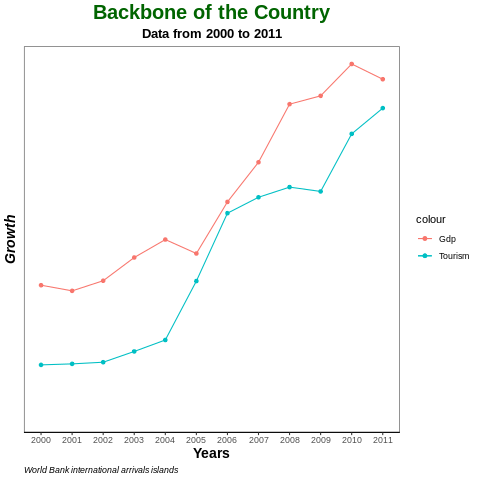

In [109]:
%%R
# Code for Line fraph
ggplot(df6,mapping =aes(x=year))+ theme_bw() + 
 #theme for graph background
 theme(axis.line.x = element_line(colour = "black"),
       axis.text.y=element_blank(),
       axis.ticks.y=element_blank(),
       panel.grid.major = element_blank(),
       panel.grid.minor = element_blank(),
       panel.background = element_blank())+
 #theme for labels
 labs(x = "Years", y = "Growth")+
  theme(
    axis.title.x = element_text(size = 14, face = "bold"),
    axis.title.y = element_text(size = 14, face = "bold.italic")
  )+
 #plotted lines
 geom_line(mapping=aes(y=gdpnom,color="Gdp"))+geom_point(mapping=aes(y=gdpnom,color="Gdp")) +
 geom_line(mapping=aes(y=receipt,color="Tourism"))+geom_point(mapping=aes(y=receipt,color="Tourism"))+
 expand_limits(y = c(20000000,2050000000)) +
 scale_x_continuous(breaks = seq(2000,2011,1))+
 #theme for title,subtitle,caption
 labs(
    title = "Backbone of the Country",
    subtitle = "Data from 2000 to 2011",
    caption = "World Bank international arrivals islands"
  ) +
  theme(
    plot.title = element_text(color = "DarkGreen", size = 20, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 13, face = "bold", hjust = 0.5),
    plot.caption = element_text(face = "italic", hjust = 0)
  )


In [110]:
%%R
#Processing of data for pie chart
sumgdpq1<-sum(df6$gdpnom)
sumrev1<-sum(df6$receipt)
sss<-sumgdpq1-sumrev1

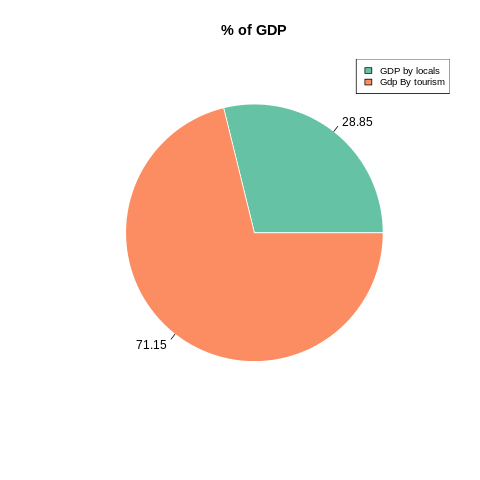

In [111]:
%%R
#code for piechart
x<-c(sss,sumrev1)
labels <-  c("GDP by locals","Gdp By tourism")
piepercent<- round(100*x/sum(x), 2)
pie(x, labels = piepercent, main = "% of GDP",col = myPalette,border="white")
legend("topright", c("GDP by locals","Gdp By tourism"), cex = 0.8,
   fill = myPalette)

In [112]:
%%R
# for question 2 use (processed)
df7<-df6[c(8,9,10,11,12),c(2,3,6,7,8,9)]
write.csv(df7,"a3.csv")
df8 <- read.csv("a3.csv")
df8<-df8[,-1]
df8

  year    pop ovnarriv arram arreur arraus
1 2007 303500   676000 14000 495000  13673
2 2008 307600   683000 14000 498000  13462
3 2009 311700   656000 15000 462000  13274
4 2010 315900   792000 19000 505000  14944
5 2011 320100   931000 24000 538000  16655


In [113]:
%%R
#Processing of data for pie chart
# Sum of Tourists
sumusa<-sum(df8$arram)
sumeur<-sum(df8$arreur)
sumaus<-sum(df8$arraus)
sum2<-sum(sumusa+sumeur+sumaus)
sumonq2<-sum(df8$ovnarriv)
ss<-sumonq2-sum2

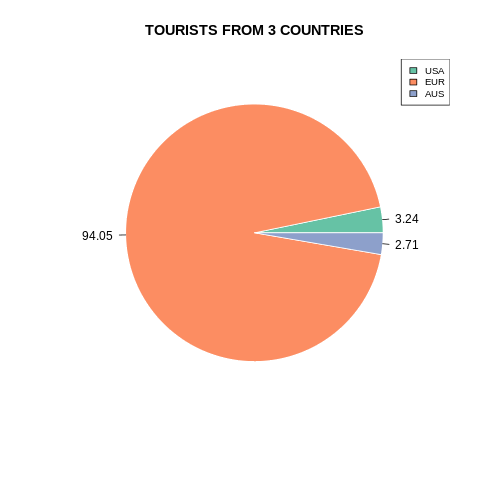

In [114]:
%%R
#Code for TOURISTS FROM 3 COUNTRIES
x<-c(sumusa,sumeur,sumaus)
labels <-  c("USA","EUR","AUS")
piepercent<- round(100*x/sum(x), 2)
pie(x, labels = piepercent, main = "TOURISTS FROM 3 COUNTRIES",col = myPalette,border="white")
legend("topright", c("USA","EUR","AUS"), cex = 0.8,
   fill = myPalette)

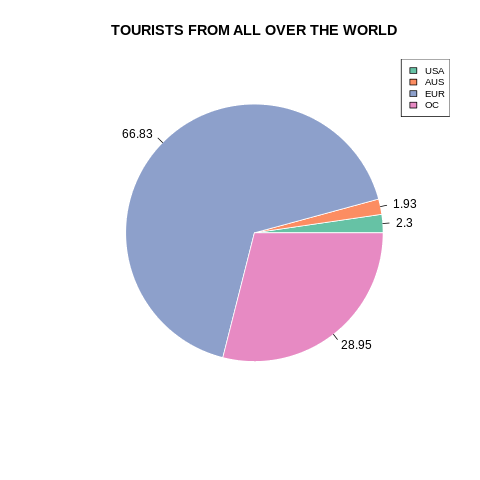

In [116]:
%%R
#Code for TOURISTS FROM ALL OVER THE WORLD
x<-c(sumusa,sumaus,sumeur,ss)
labels <-  c("USA","AUS","EUR","OC")
piepercent<- round(100*x/sum(x), 2)
pie(x, labels = piepercent, main = "TOURISTS FROM ALL OVER THE WORLD",col = myPalette,border="white")
legend("topright", c("USA","AUS","EUR","OC"), cex = 0.8,
   fill = myPalette)

In [117]:
%%R
#Processing of data for pie chart
pr1<- read.table("a1.csv", header=TRUE,sep=",")
pr2<-pr1[, c(1,10)]
pr3<-subset(pr2, country==12|country==8 |country==1 |country==13 |country==6)

In [118]:
%%R
#deleteing the year 2012 for all countries
N<-function(df, n)df[-(seq(n,to=nrow(df),by=n)),]
pr4<-N(pr3, 13)

In [119]:
%%R
#writing the data into a4.csv
write.csv(pr4,"a4.csv")
pr5<- read.csv("a4.csv")
pr5<-pr5[,-1]

In [120]:
%%R
#Processing of data for pie chart
p1<-sum(pr5[pr5$country == 1,]$ovnarriv, na.rm=TRUE)
p2<-sum(pr5[pr5$country == 6,]$ovnarriv, na.rm=TRUE)
p3<-sum(pr5[pr5$country == 8,]$ovnarriv, na.rm=TRUE)
p4<-sum(pr5[pr5$country == 12,]$ovnarriv, na.rm=TRUE)
p5<-sum(pr5[pr5$country == 13,]$ovnarriv, na.rm=TRUE)

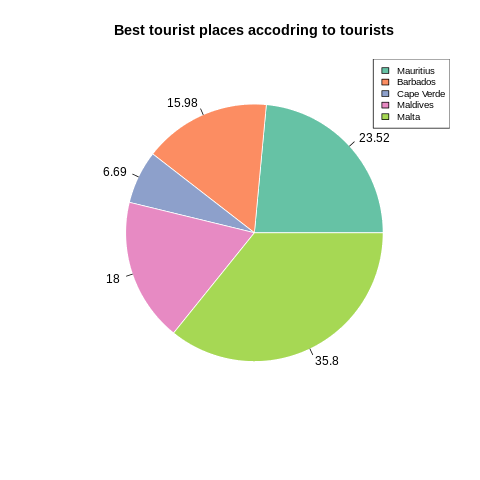

In [121]:
%%R
#Code for piechart (presentation)
p<-c(p1,p2,p3,p4,p5)
labels <-  c("Mauritius","Barbados","Cape Verde","Maldives","Malta")
piepercent<- round(100*p/sum(p), 2)
pie(p, labels = piepercent, main = "Best tourist places accodring to tourists",col = myPalette,border="white")
legend("topright",c("Mauritius","Barbados","Cape Verde","Maldives","Malta"), cex = 0.8,
   fill = myPalette)